**Importing the required Libraries**

In [4]:
import pandas as pd       # For data manipulation and analysis
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns     # For statistical data visualization

Loading the Dataset

In [5]:
df = pd.read_csv('C:/Users/kipsa/OneDrive/Documents/2019.csv')

In [6]:
df.head() #First few rows

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


**Handling Missing Values**

In [9]:
df.isnull().sum() 

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [10]:
duplicates = df.duplicated() 
print("Duplicate rows:", duplicates.sum())

Duplicate rows: 0


In [11]:
df = df.rename(columns={'Score': 'Happiness Score'}) 
    

In [12]:
df = df.rename(columns={'Country or region': 'Country'}) #Renaming Country or region column to Country

print(df.columns)

Index(['Overall rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


Univariate Exploratory Data Analysis

In [13]:
df

,Overall rank,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


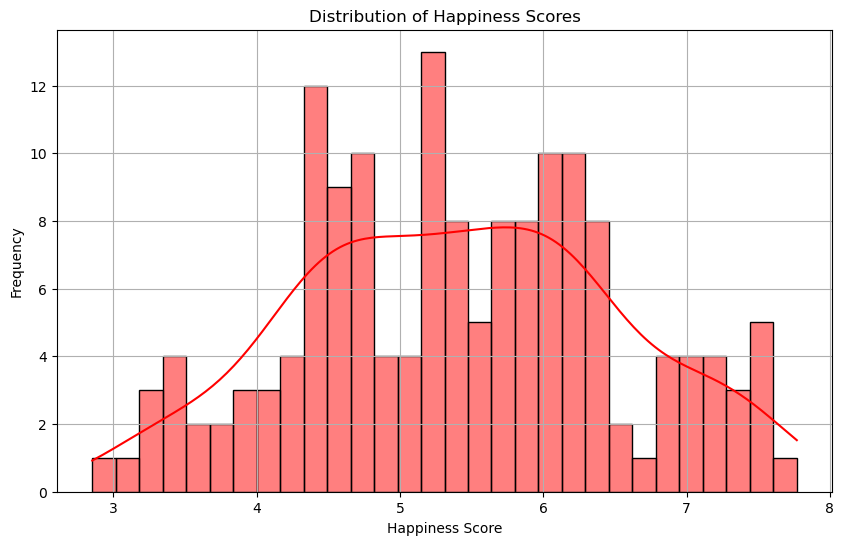

In [14]:
# Plot histogram for the happiness scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Happiness Score'], bins=30, kde=True, color='red')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

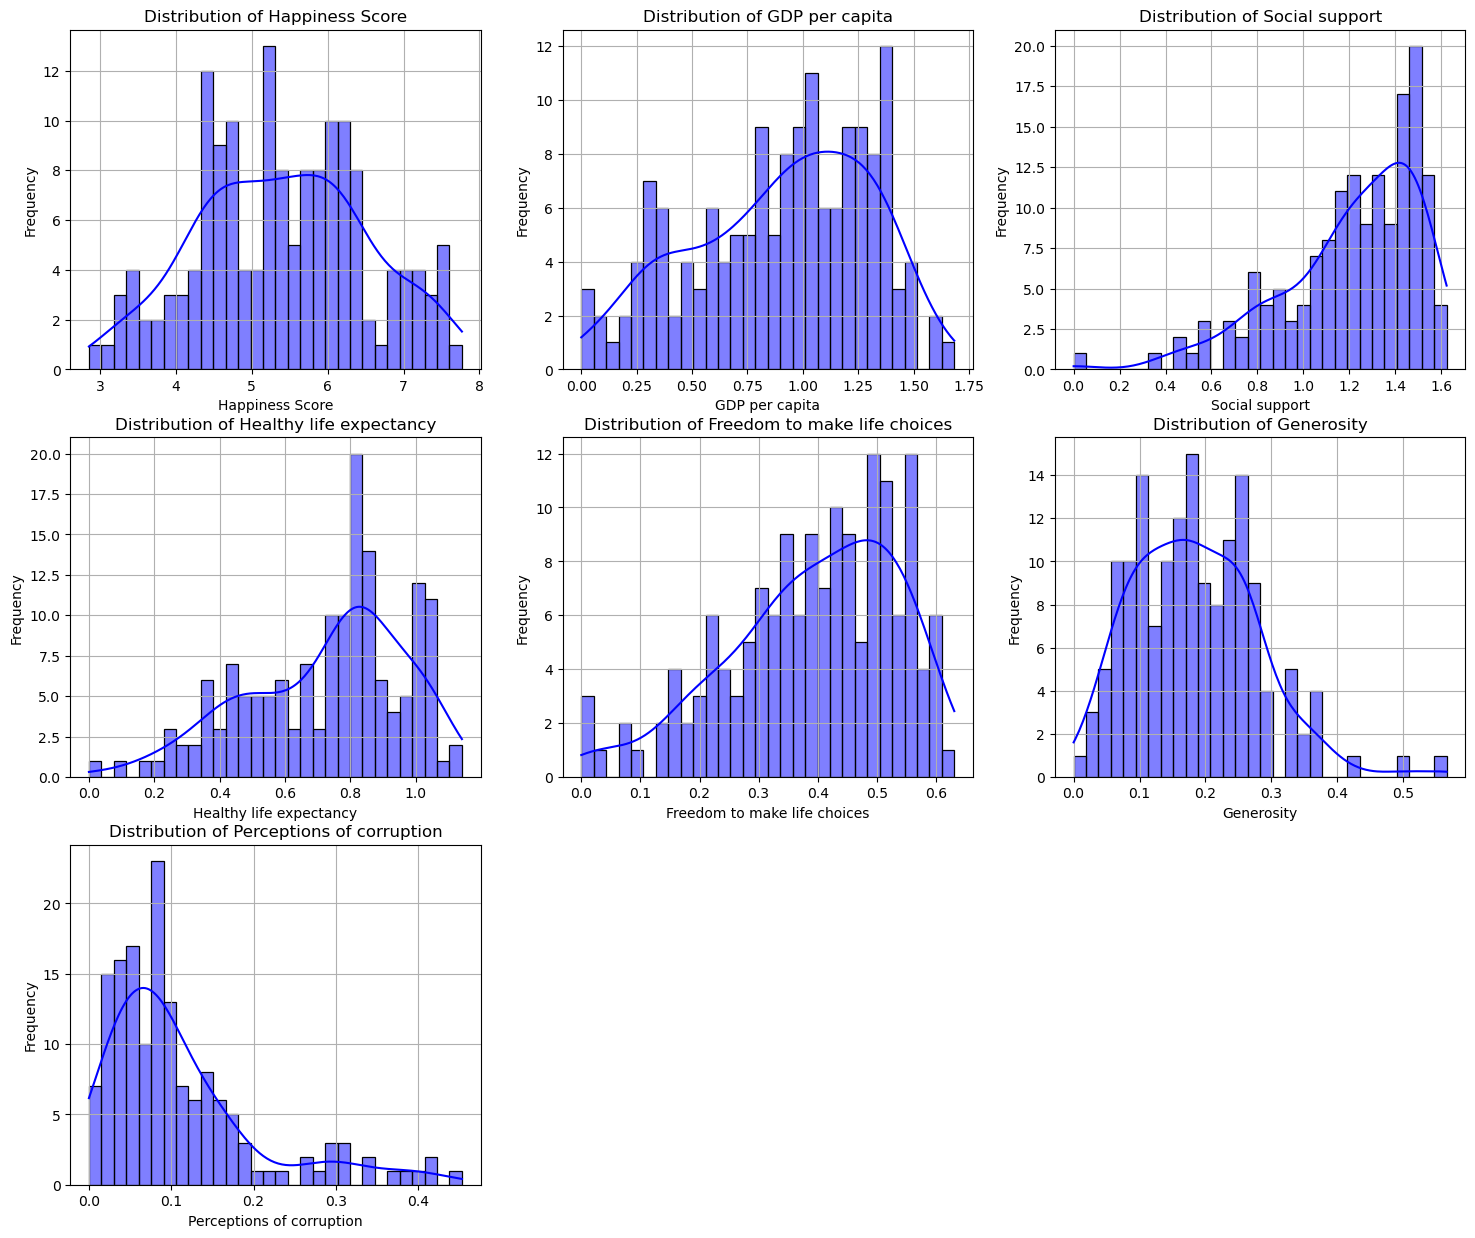

In [19]:
# Define numerical columns to plot
df_columns = ['Happiness Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create subplots
n_columns = 3  # Number of columns in subplot grid
n_rows = (len(df_columns) + n_columns - 1) // n_columns  # Calculate number of needed rows
plt.figure(figsize=(18, n_rows * 5))   #Size Adjustment
# Loop through each column and plot
for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_columns, i + 1)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)


In [20]:
#Checking for Skweness and kurtosis
skewness = df[df_columns].skew()

# Compute kurtosis for numerical columns
kurtosis = df[numerical_columns].kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 Happiness Score                 0.011450
GDP per capita                 -0.385232
Social support                 -1.134728
Healthy life expectancy        -0.613841
Freedom to make life choices   -0.685636
Generosity                      0.745942
Perceptions of corruption       1.650410
dtype: float64

Kurtosis:
 Happiness Score                -0.608375
GDP per capita                 -0.769902
Social support                  1.229005
Healthy life expectancy        -0.302895
Freedom to make life choices   -0.068857
Generosity                      1.173189
Perceptions of corruption       2.416824
dtype: float64


**Bivariate and Multivariate EDA** 

**Correlation Matrix**

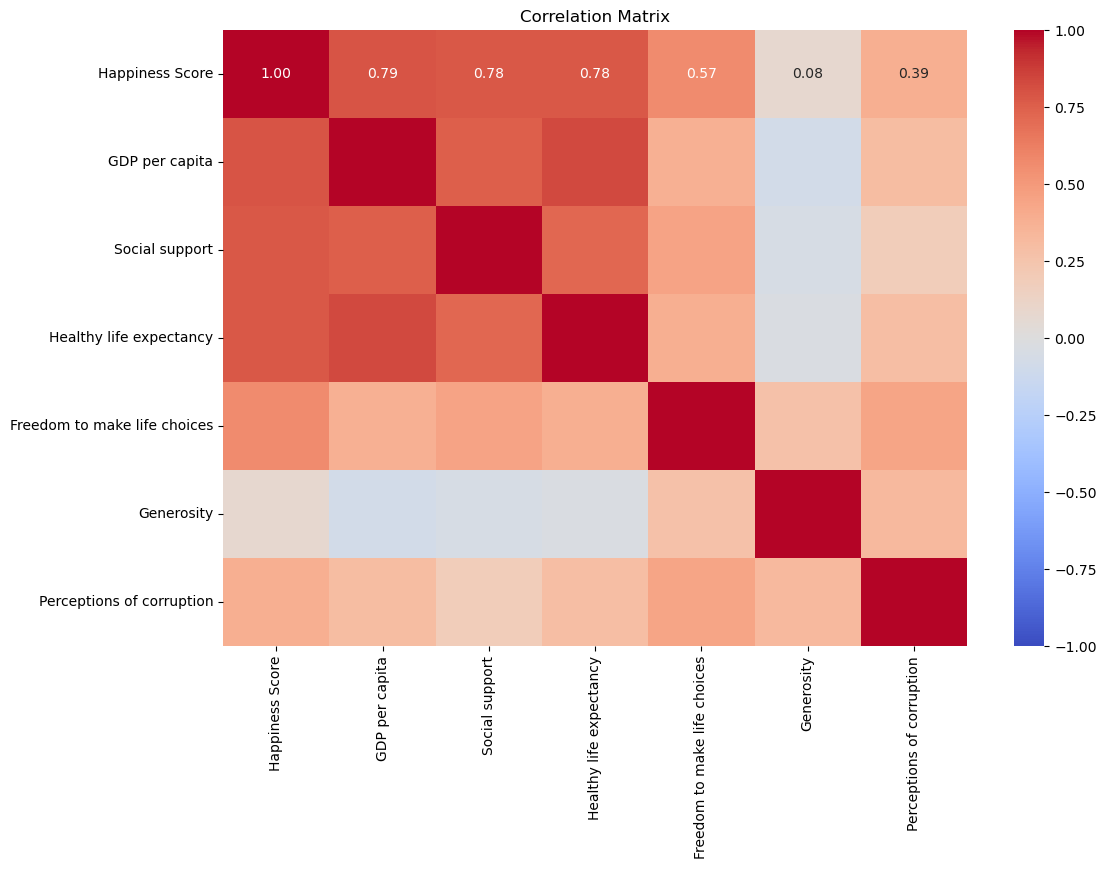

In [24]:
# Colums to use
df_columns = [
    'Happiness Score', 
    'GDP per capita', 
    'Social support', 
    'Healthy life expectancy', 
    'Freedom to make life choices', 
    'Generosity', 
    'Perceptions of corruption'
]

# Correlation Matrix
correlation_matrix = df[df_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Happiness score has a highly positive correlation with GDP per capita, Social support, and Healthy life expectancy.
On the other end, it is lowly negatively correlated with Generosity, and lowly positively correlated with Freedom to make life choices and Perceptions of Corruption.

**Scatter Plots & Pair Plots**

C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

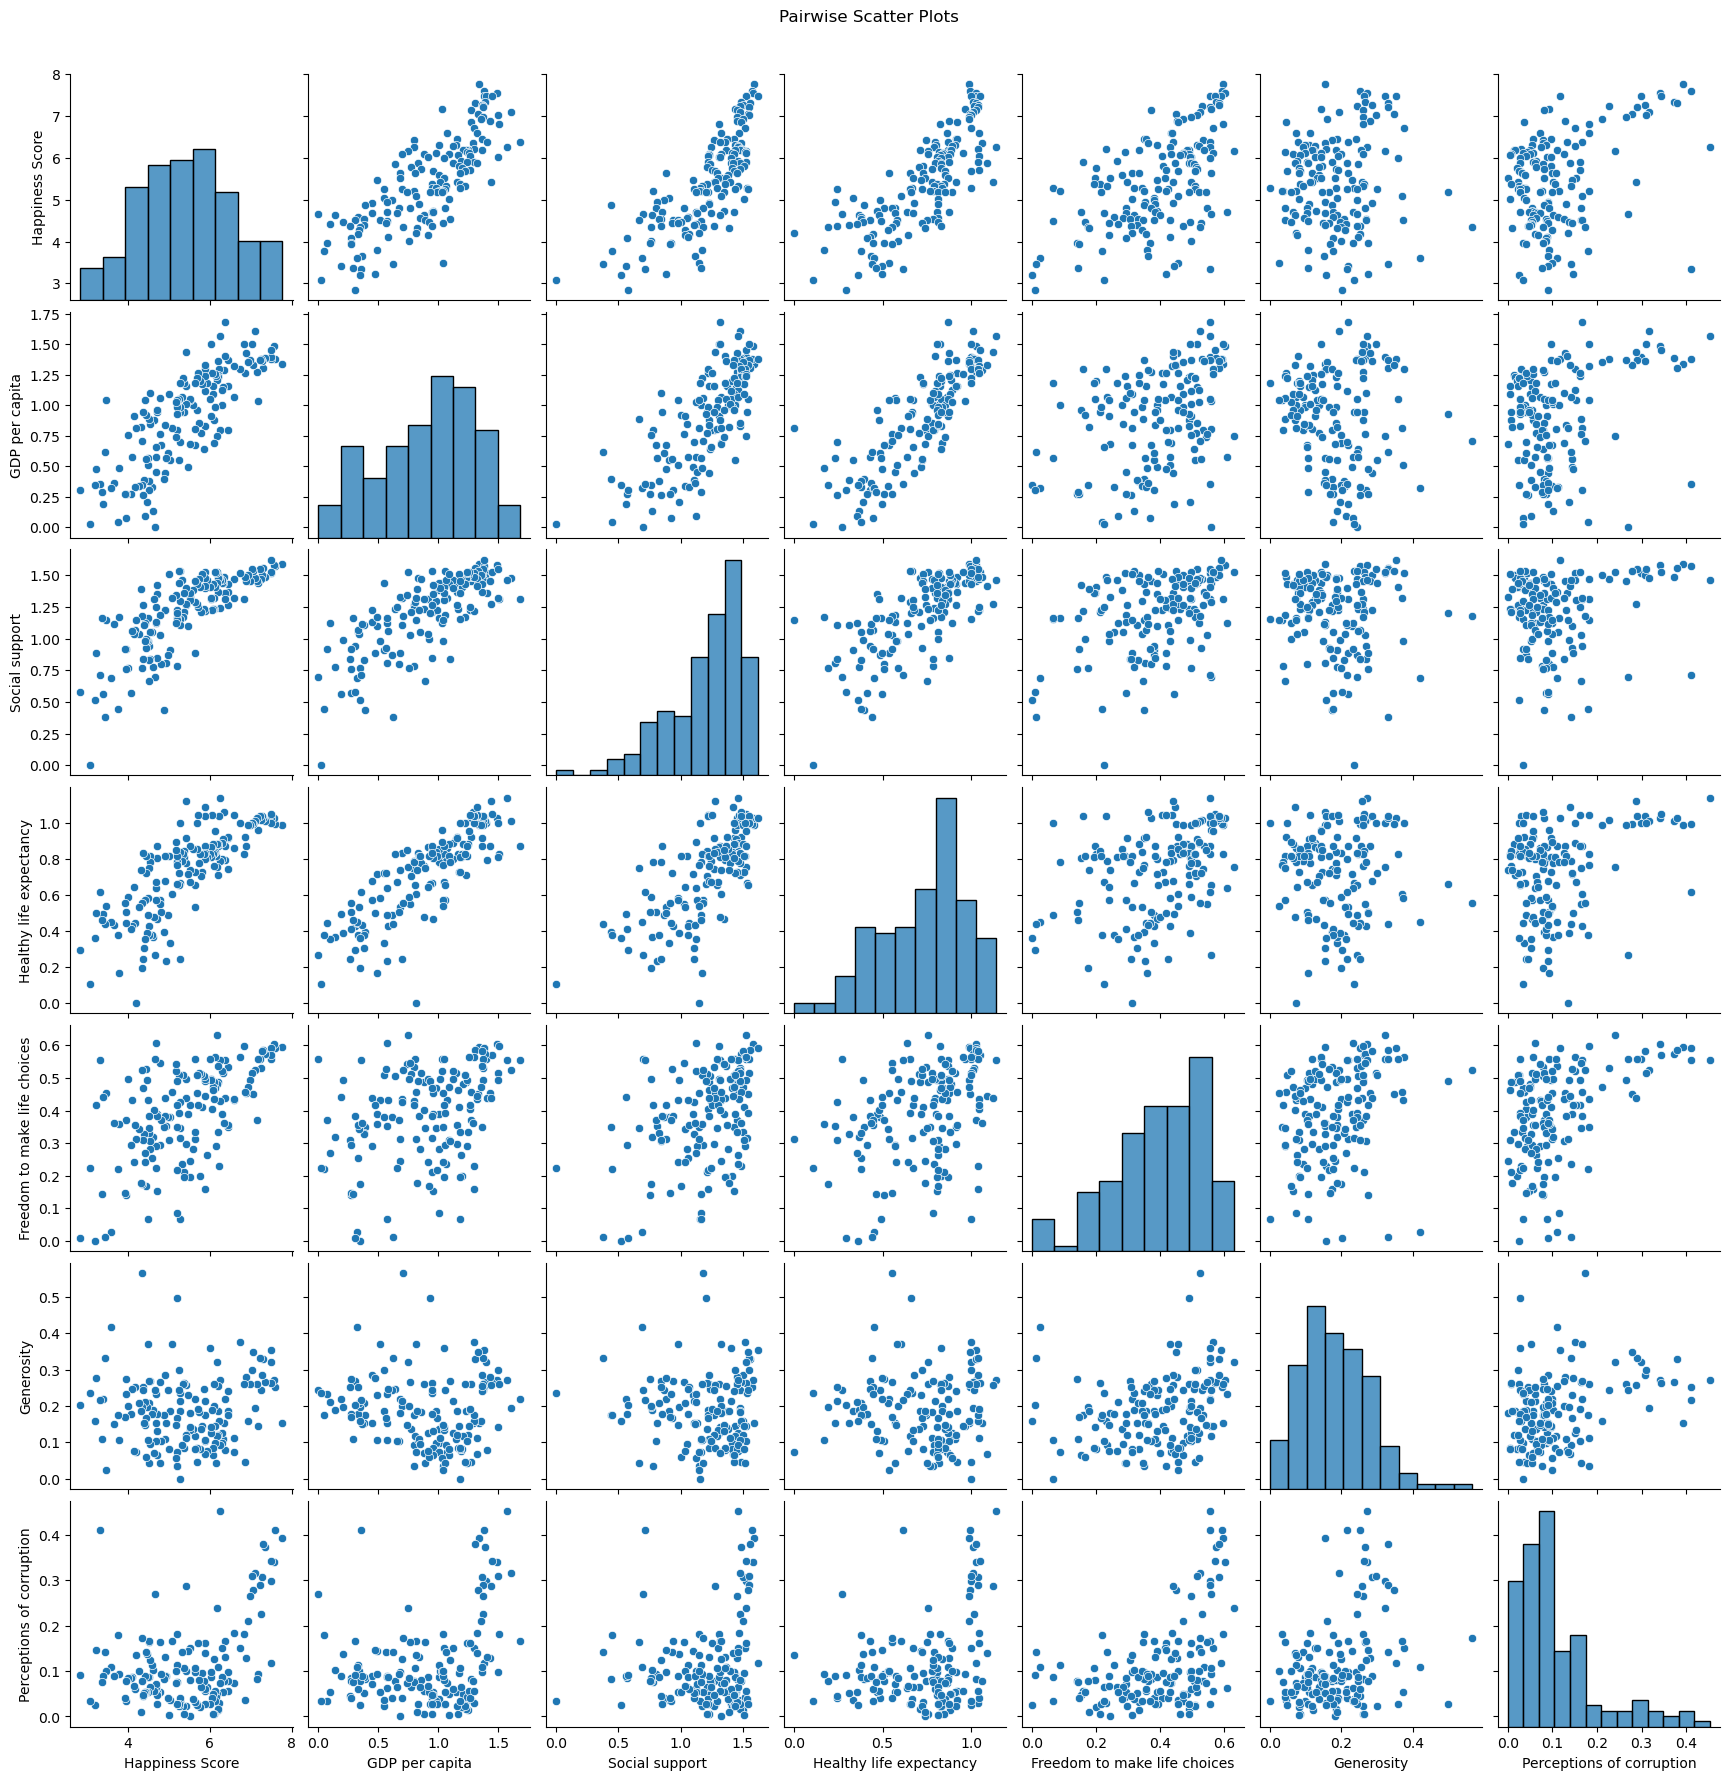

In [22]:
# Plot pairwise scatter plots
sns.pairplot(df[df_columns])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

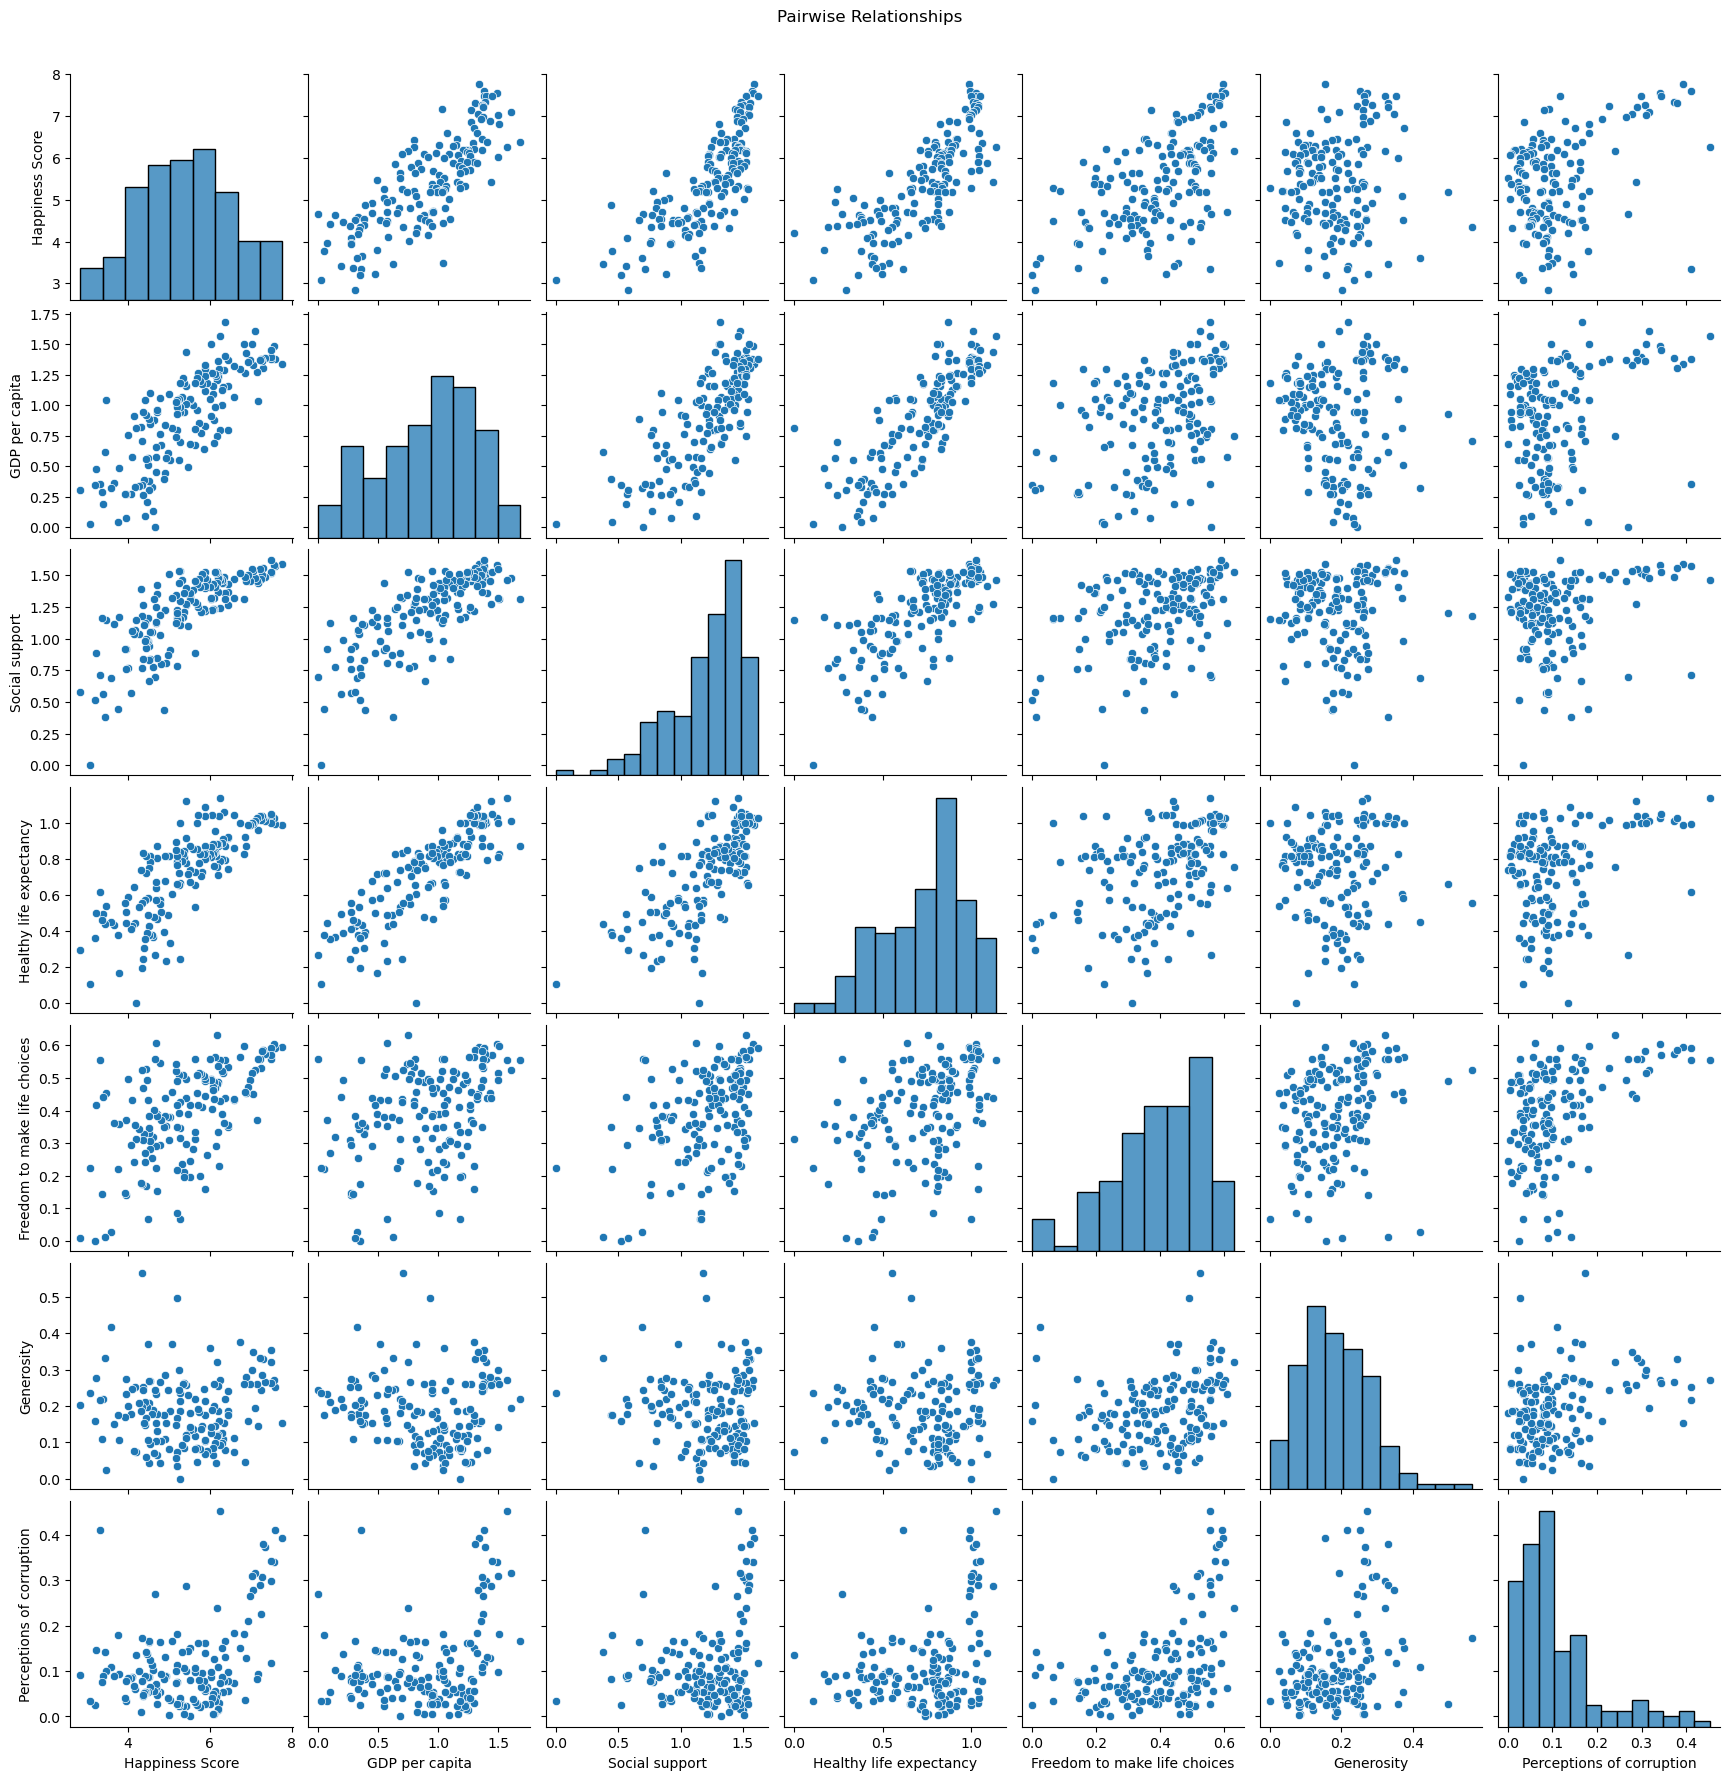

In [79]:
# Define numerical columns for pairplot
df_columns = [
    'Happiness Score', 
    'GDP per capita', 
    'Social support', 
    'Healthy life expectancy', 
    'Freedom to make life choices', 
    'Generosity', 
    'Perceptions of corruption'
]

# Create pairplot
sns.pairplot(df[df_columns])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

**Facet Grids using Country as the Categorical Column**

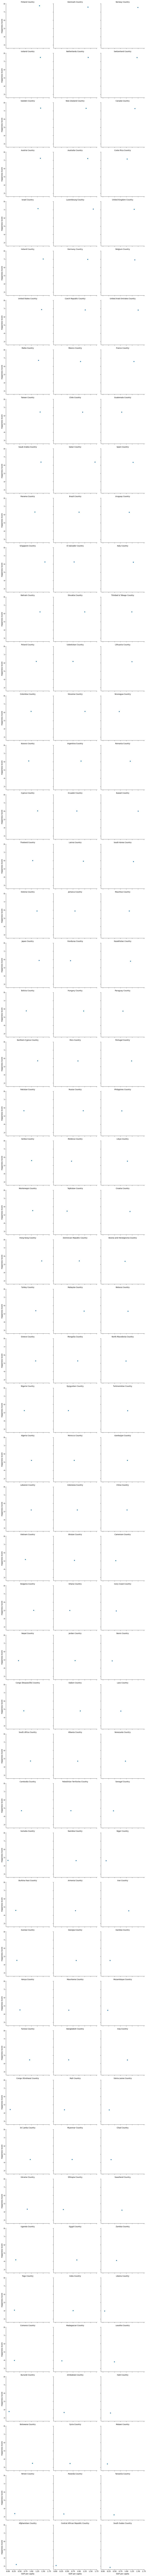

In [81]:
df_columns = [
    'Happiness Score', 
    'GDP per capita', 
    'Social support', 
    'Healthy life expectancy', 
    'Freedom to make life choices', 
    'Generosity', 
    'Perceptions of corruption'
]

# Define a variable for FacetGrid
facet_grid = sns.FacetGrid(df, col='Country', col_wrap=3, height=4)

# Map scatter plots to the grid
facet_grid.map_dataframe(sns.scatterplot, x='GDP per capita', y='Happiness Score')

# Add titles and adjust layout
facet_grid.set_axis_labels('GDP per capita', 'Happiness Score')
facet_grid.set_titles(col_template="{col_name} Country")
plt.show()

C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kipsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

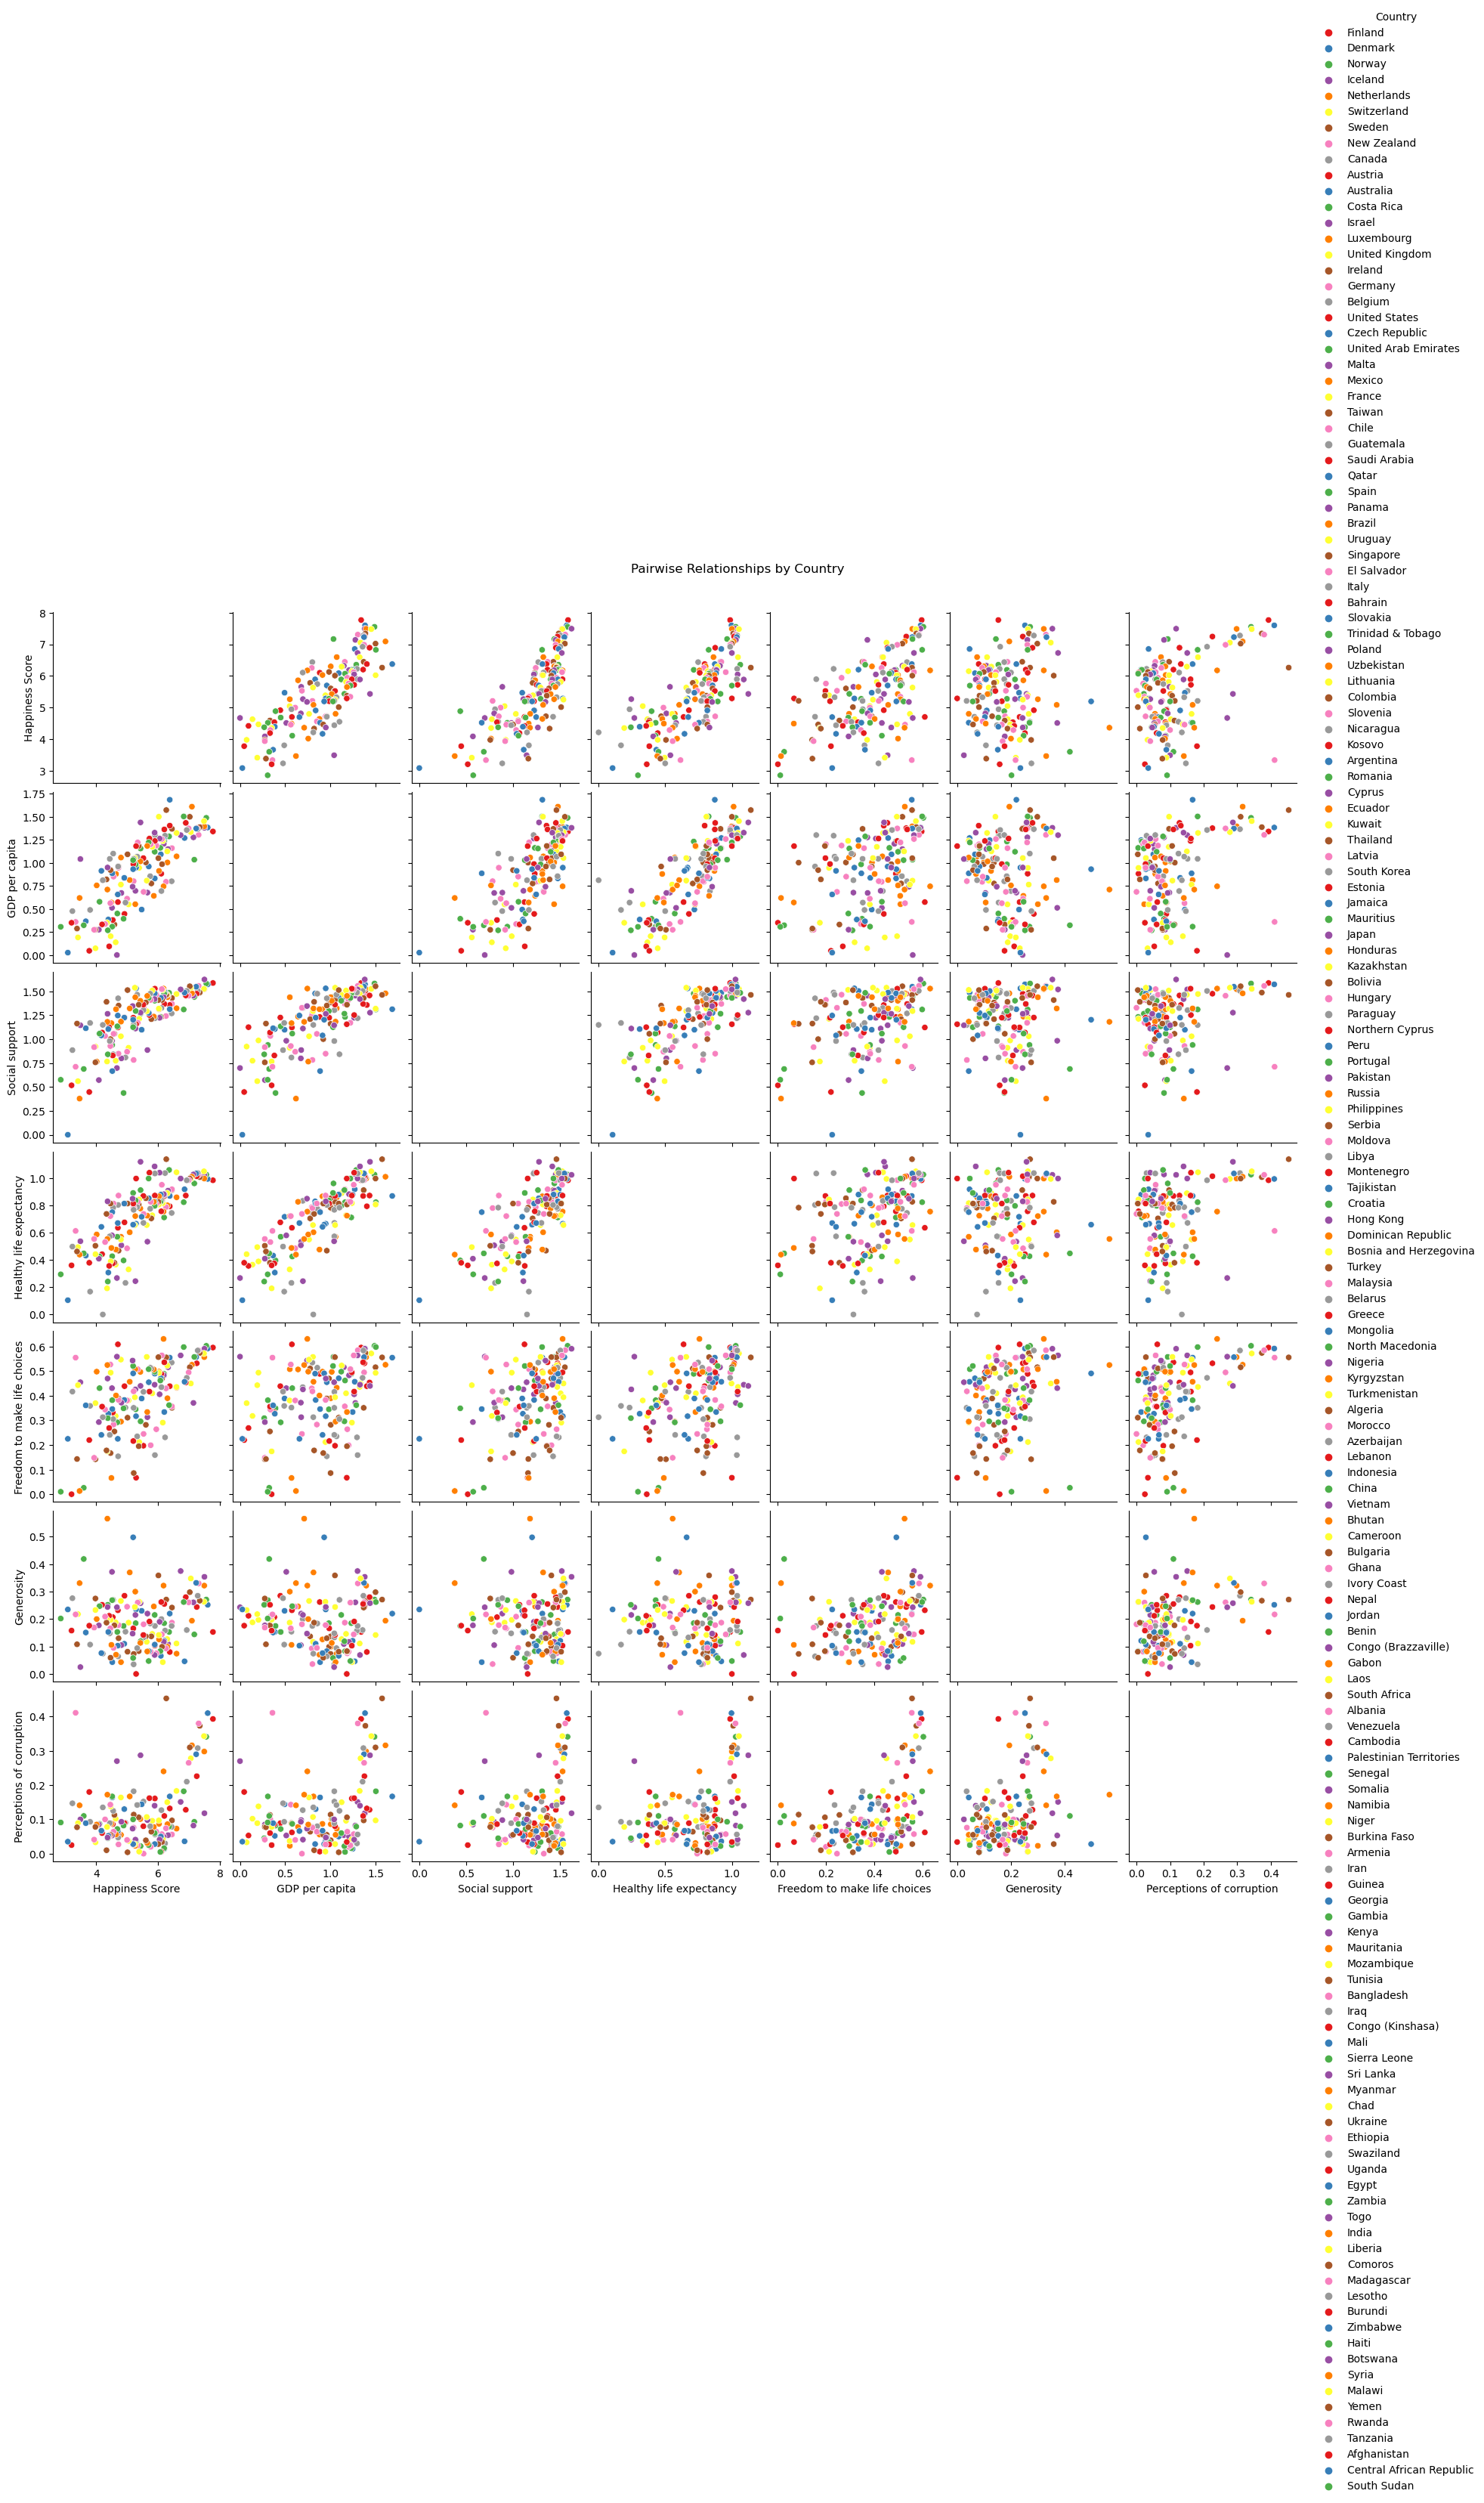

In [83]:
# Create pairplot with regions differentiated by color
sns.pairplot(df[df_columns + ['Country']], hue='Country', palette='Set1')

# Add title to the entire plot
plt.suptitle('Pairwise Relationships by Country', y=1.02)

# Show plot
plt.show()

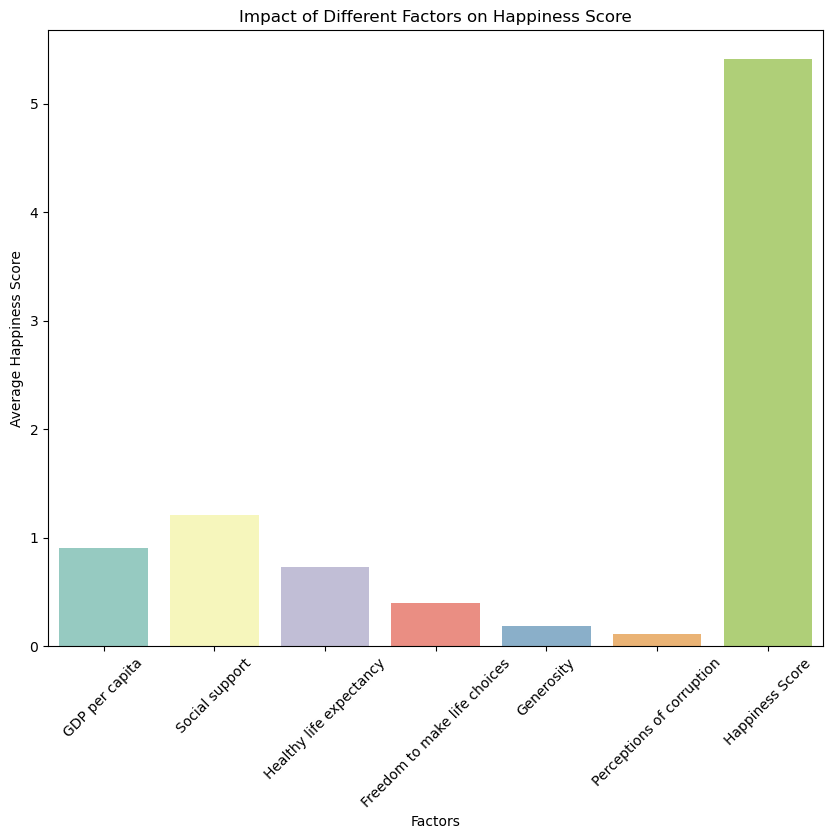

In [111]:
# Assuming 'factors' is a list of factor column names and 'Happiness Score' is the target column
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

mean_scores = df[factors + ['Happiness Score']].mean().reset_index()

mean_scores.columns = ['Factor', 'Mean Score']

plt.figure(figsize=(10, 8))
sns.barplot(x='Factor', y='Mean Score', data=mean_scores, palette='Set3')

plt.title('Impact of Different Factors on Happiness Score')
plt.xlabel('Factors')
plt.ylabel('Average Happiness Score')

plt.xticks(rotation=45)

plt.show()


Happiness Score is highly positively correlated with GDP per Capita, Social support, and Healthy life expectancy and thus Happiness Score is a strong predictor of the GDP per capita, Social suppot and Healthy life expectancy of a given Country.

On the other hand, Happiness Score has a negative correlation with Freedom to make choices, Generocity, and Perceptions of corruption and thus it may not be a suitable indicator of the above.